# Imports

In [2]:
%matplotlib inline

import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt

# Synthetic Fluxes

## Input parameters

Input fake EWs and model parameters for generating the synthetic fluxes

In [3]:
ew = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-EWs', format='ascii', delimiter=' ')
input_param = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-input_params', format='ascii', delimiter=' ')

In [4]:
input_param

y+,Te,log(ne),c(Hb),aH,aHe,tauHe,log(xi)
float64,int64,float64,float64,float64,float64,float64,float64
0.088,16500,2.2,0.1,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.0,0.0,0.0,0.0,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.5,0.0
0.088,16500,2.2,0.1,3.0,0.3,0.0,-2.0
0.088,16500,2.2,0.1,3.0,0.0,0.5,-2.0
0.088,16500,2.2,0.1,0.0,0.3,0.5,-2.0
0.088,16500,2.2,0.0,3.0,0.3,0.5,-2.0
0.088,16500,0.0,0.1,3.0,0.3,0.5,-2.0


## Load tables

In [7]:
erik = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/SyntheticFluxes.DAT', format='ascii', delimiter='\t')
ours = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours', format='ascii', delimiter=' ')
A2002 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_A2002', format='ascii', delimiter=' ')
R2015 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_R2015', format='ascii', delimiter=' ')

In [8]:
erik[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Syn1,0.1669517,0.014090856,0.2234386,0.4334171,0.034539614,1,0.1047526,3.397364,0.030201202,0.0285201,3.724002
Syn2,0.1137611,0.0012994061,0.1894054,0.3793492,0.002675869,1,0.0070080128,5.467042,0.0019774013,0.0015783558,0.2149278
Syn3,0.093445748,0.0010515138,0.1673789,0.3567378,0.0025774788,1,0.0078170402,5.924242,0.0022537301,0.0021282798,0.370975


In [9]:
ours[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.16528498896819432,0.014052694648517139,0.22378233373342907,0.43372567772681364,0.03444780882458205,1.0,0.10448152236958416,3.3974908674441,0.030123482024397276,0.028451605176672307,2.9766982135047044
syn2,0.07622416624784771,0.0012969882560045754,0.189683395873366,0.37952672175159813,0.0026708902556761443,1.0,0.006994973018555967,5.472389575871823,0.0019737222802079413,0.0015754188721798775,0.06111517450184329
syn3,0.05952482932454369,0.001048666143745476,0.1676365251660905,0.3569917180509557,0.0025706280356961805,1.0,0.007796813201767683,5.925298572496037,0.0022479301316096142,0.0021231682485279174,0.10559513353496384


In [10]:
A2002[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.1554771383762692,0.012289871001259438,0.2305644213559952,0.4544785748526514,0.030126544219391645,1.0,0.09137496146142249,3.192843611936261,0.026344677476334795,0.024882527240920674,2.118171176938198
syn2,0.09559670014962747,0.0006264484833531027,0.25415557345513223,0.5126311836503832,0.0012900464920362386,1.0,0.003378588987435521,3.4864575065975014,0.0009533126636052831,0.0007609311484154705,0.025069686065618227
syn3,0.07378101340524999,0.0005065082989392795,0.2246151118786241,0.4821928904853843,0.0012416195958378491,1.0,0.003765879746884604,3.7750056717442546,0.0010857557230075766,0.0010254954299209053,0.04331554101508351


In [11]:
R2015[0:3]

Synthetic,H8+HeI3889,HeI4026,Hd4102,Hg4340,HeI4471,Hb4861,HeI5876,Ha6563,HeI6678,HeI7065,HeI10830
str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
syn1,0.1501166343593259,0.012369163578370571,0.21173389964160536,0.422384052355026,0.03032091658752824,1.0,0.0919645002919736,3.92885138011565,0.026514649754322592,0.025043065924342852,2.3103166808654647
syn2,0.06325236102951454,0.0006434483346517583,0.16435441582733776,0.36991825198240347,0.001325054316487474,1.0,0.003470273318888048,6.360110964615285,0.0009791825857985183,0.0007815804383656017,0.030207183753746935
syn3,0.049017482076001234,0.0005202533489989654,0.1452515284120672,0.347953766480867,0.0012753132658835675,1.0,0.0038680739374794774,6.886490060157595,0.0011152197353378435,0.0010533241664880267,0.052192137684167


## Run comparisons

### Synthetic 1 (all parameters)

In [ ]:
synth_idx = 0 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], ours[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-ours[col][synth_idx])/ours[col][synth_idx], 'o')
plt.axhline(0.0, color='black', alpha=0.25, ls='--')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.ylim()
plt.show()

### Synthetic 2 (just y+, T)

In [ ]:
synth_idx = 1 # synthetic2; just emissivities

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, erik[col][synth_idx], ours[col][synth_idx])
    plt.plot(c, (erik[col][synth_idx]-ours[col][synth_idx])/ours[col][synth_idx], 'o')
plt.xticks(np.arange(1, len(erik.colnames), 1), ['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                                                 r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], \
           rotation=45, ha='right')
plt.xlim(0, len(erik.colnames))
plt.show()

In [ ]:
for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    print (col, (erik[col][0]-ours[col][0])/ours[col][0])

### All Synthetic Ours vs Erik's

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/thsyu/.

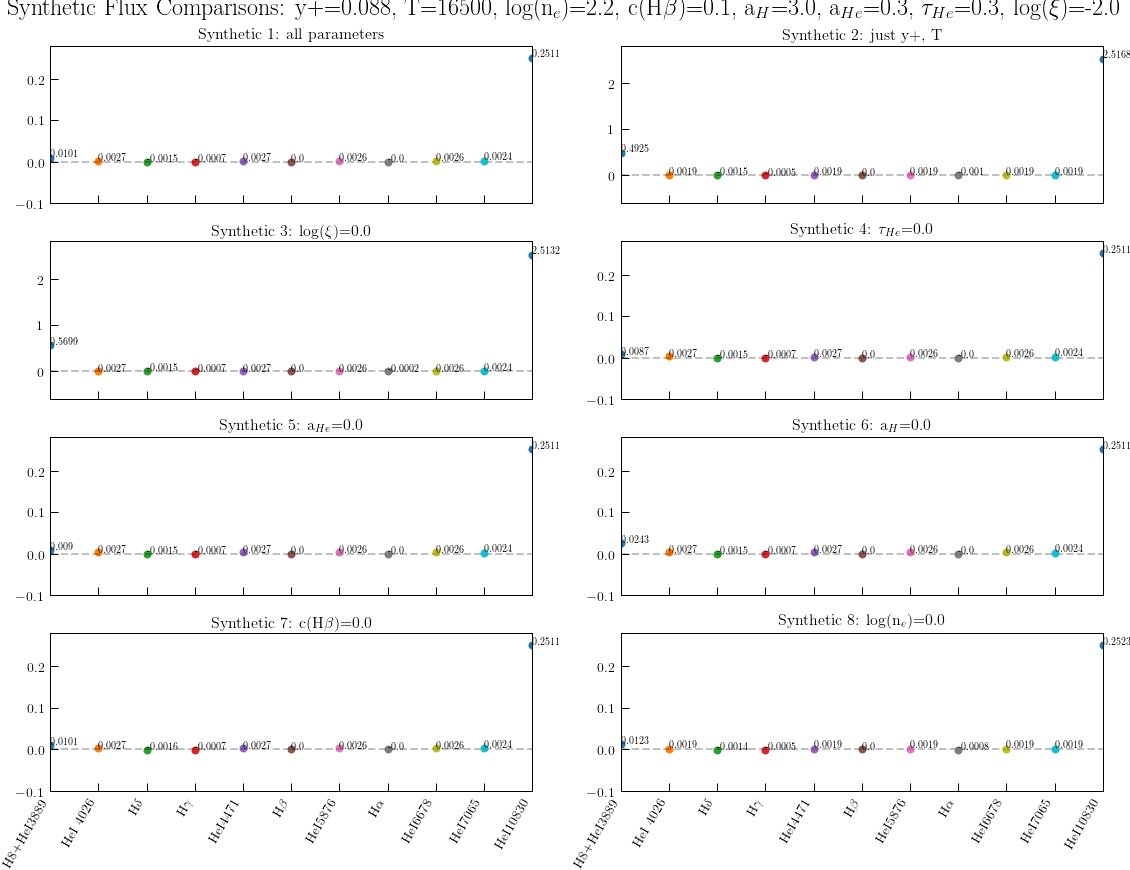

In [12]:
f, ax = plt.subplots(4,2, figsize=(16, 12), sharex=True)

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    ax[0,0].plot(c, (erik[col][0]-ours[col][0])/ours[col][0], marker='o', markersize=8)
    ax[0,0].text(c, (erik[col][0]-ours[col][0])/ours[col][0], str(round((erik[col][0]-ours[col][0])/ours[col][0], 4)))
    ax[0,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,0].set_title('Synthetic 1: all parameters')
    ax[0,0].set_ylim(-0.1, 0.28)
    ax[0,1].plot(c, (erik[col][1]-ours[col][1])/ours[col][1], marker='o', markersize=8)
    ax[0,1].text(c, (erik[col][1]-ours[col][1])/ours[col][1], str(round((erik[col][1]-ours[col][1])/ours[col][1], 4)))
    ax[0,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,1].set_title('Synthetic 2: just y+, T')
    ax[0,1].set_ylim(-0.6, 2.8)
    ax[1,0].plot(c, (erik[col][2]-ours[col][2])/ours[col][2], marker='o', markersize=8)
    ax[1,0].text(c, (erik[col][2]-ours[col][2])/ours[col][2], str(round((erik[col][2]-ours[col][2])/ours[col][2], 4)))
    ax[1,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,0].set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax[1,0].set_ylim(-0.6, 2.8)
    ax[1,1].plot(c, (erik[col][3]-ours[col][3])/ours[col][3], marker='o', markersize=8)
    ax[1,1].text(c, (erik[col][3]-ours[col][3])/ours[col][3], str(round((erik[col][3]-ours[col][3])/ours[col][3], 4)))
    ax[1,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,1].set_title(r'Synthetic 4: $\tau_{He}$=0.0')
    ax[1,1].set_ylim(-0.1, 0.28)
    ax[2,0].plot(c, (erik[col][4]-ours[col][4])/ours[col][4], marker='o', markersize=8)
    ax[2,0].text(c, (erik[col][4]-ours[col][4])/ours[col][4], str(round((erik[col][4]-ours[col][4])/ours[col][4], 4)))
    ax[2,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,0].set_title(r'Synthetic 5: a$_{He}$=0.0')
    ax[2,0].set_ylim(-0.1, 0.28)
    ax[2,1].plot(c, (erik[col][5]-ours[col][5])/ours[col][5], marker='o', markersize=8)
    ax[2,1].text(c, (erik[col][5]-ours[col][5])/ours[col][5], str(round((erik[col][5]-ours[col][5])/ours[col][5], 4)))
    ax[2,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,1].set_title(r'Synthetic 6: a$_{H}$=0.0')
    ax[2,1].set_ylim(-0.1, 0.28)
    ax[3,0].plot(c, (erik[col][6]-ours[col][6])/ours[col][6], marker='o', markersize=8)
    ax[3,0].text(c, (erik[col][6]-ours[col][6])/ours[col][6], str(round((erik[col][6]-ours[col][6])/ours[col][6], 4)))
    ax[3,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,0].set_title(r'Synthetic 7: c(H$\beta$)=0.0')
    ax[3,0].set_ylim(-0.1, 0.28)
    ax[3,0].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax[3,1].plot(c, (erik[col][7]-ours[col][7])/ours[col][7], marker='o', markersize=8)
    ax[3,1].text(c, (erik[col][7]-ours[col][7])/ours[col][7], str(round((erik[col][7]-ours[col][7])/ours[col][7], 4)))
    ax[3,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,1].set_title(r'Synthetic 8: log(n$_{e}$)=0.0')
    ax[3,1].set_ylim(-0.1, 0.28)
    ax[3,1].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
#f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-comparison.pdf', overwrite=True)
f.show()

### All Synthetic A2002 vs Erik's

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


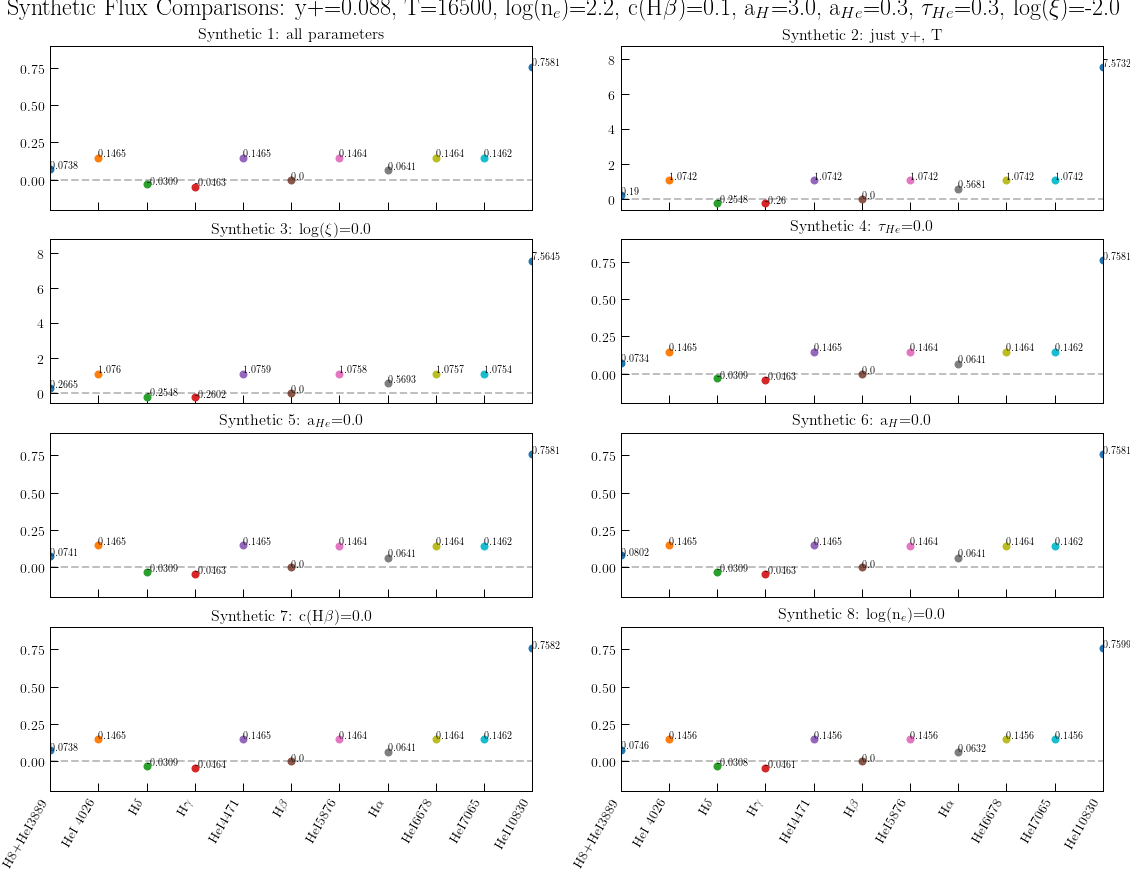

In [13]:
f, ax = plt.subplots(4,2, figsize=(16, 12), sharex=True)

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    ax[0,0].plot(c, (erik[col][0]-A2002[col][0])/A2002[col][0], marker='o', markersize=8)
    ax[0,0].text(c, (erik[col][0]-A2002[col][0])/A2002[col][0], str(round((erik[col][0]-A2002[col][0])/A2002[col][0], 4)))
    ax[0,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,0].set_title('Synthetic 1: all parameters')
    ax[0,0].set_ylim(-0.2, 0.90)
    ax[0,1].plot(c, (erik[col][1]-A2002[col][1])/A2002[col][1], marker='o', markersize=8)
    ax[0,1].text(c, (erik[col][1]-A2002[col][1])/A2002[col][1], str(round((erik[col][1]-A2002[col][1])/A2002[col][1], 4)))
    ax[0,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,1].set_title('Synthetic 2: just y+, T')
    ax[0,1].set_ylim(-0.62, 8.8)
    ax[1,0].plot(c, (erik[col][2]-A2002[col][2])/A2002[col][2], marker='o', markersize=8)
    ax[1,0].text(c, (erik[col][2]-A2002[col][2])/A2002[col][2], str(round((erik[col][2]-A2002[col][2])/A2002[col][2], 4)))
    ax[1,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,0].set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax[1,0].set_ylim(-0.62, 8.8)
    ax[1,1].plot(c, (erik[col][3]-A2002[col][3])/A2002[col][3], marker='o', markersize=8)
    ax[1,1].text(c, (erik[col][3]-A2002[col][3])/A2002[col][3], str(round((erik[col][3]-A2002[col][3])/A2002[col][3], 4)))
    ax[1,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,1].set_title(r'Synthetic 4: $\tau_{He}$=0.0')
    ax[1,1].set_ylim(-0.2, 0.90)
    ax[2,0].plot(c, (erik[col][4]-A2002[col][4])/A2002[col][4], marker='o', markersize=8)
    ax[2,0].text(c, (erik[col][4]-A2002[col][4])/A2002[col][4], str(round((erik[col][4]-A2002[col][4])/A2002[col][4], 4)))
    ax[2,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,0].set_title(r'Synthetic 5: a$_{He}$=0.0')
    ax[2,0].set_ylim(-0.2, 0.90)
    ax[2,1].plot(c, (erik[col][5]-A2002[col][5])/A2002[col][5], marker='o', markersize=8)
    ax[2,1].text(c, (erik[col][5]-A2002[col][5])/A2002[col][5], str(round((erik[col][5]-A2002[col][5])/A2002[col][5], 4)))
    ax[2,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,1].set_title(r'Synthetic 6: a$_{H}$=0.0')
    ax[2,1].set_ylim(-0.2, 0.90)
    ax[3,0].plot(c, (erik[col][6]-A2002[col][6])/A2002[col][6], marker='o', markersize=8)
    ax[3,0].text(c, (erik[col][6]-A2002[col][6])/A2002[col][6], str(round((erik[col][6]-A2002[col][6])/A2002[col][6], 4)))
    ax[3,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,0].set_title(r'Synthetic 7: c(H$\beta$)=0.0')
    ax[3,0].set_ylim(-0.2, 0.90)
    ax[3,0].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax[3,1].plot(c, (erik[col][7]-A2002[col][7])/A2002[col][7], marker='o', markersize=8)
    ax[3,1].text(c, (erik[col][7]-A2002[col][7])/A2002[col][7], str(round((erik[col][7]-A2002[col][7])/A2002[col][7], 4)))
    ax[3,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,1].set_title(r'Synthetic 8: log(n$_{e}$)=0.0')
    ax[3,1].set_ylim(-0.2, 0.90)
    ax[3,1].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-A2002comparison.pdf', overwrite=True)
f.show()

### All Synthetic R2015 vs Erik's

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


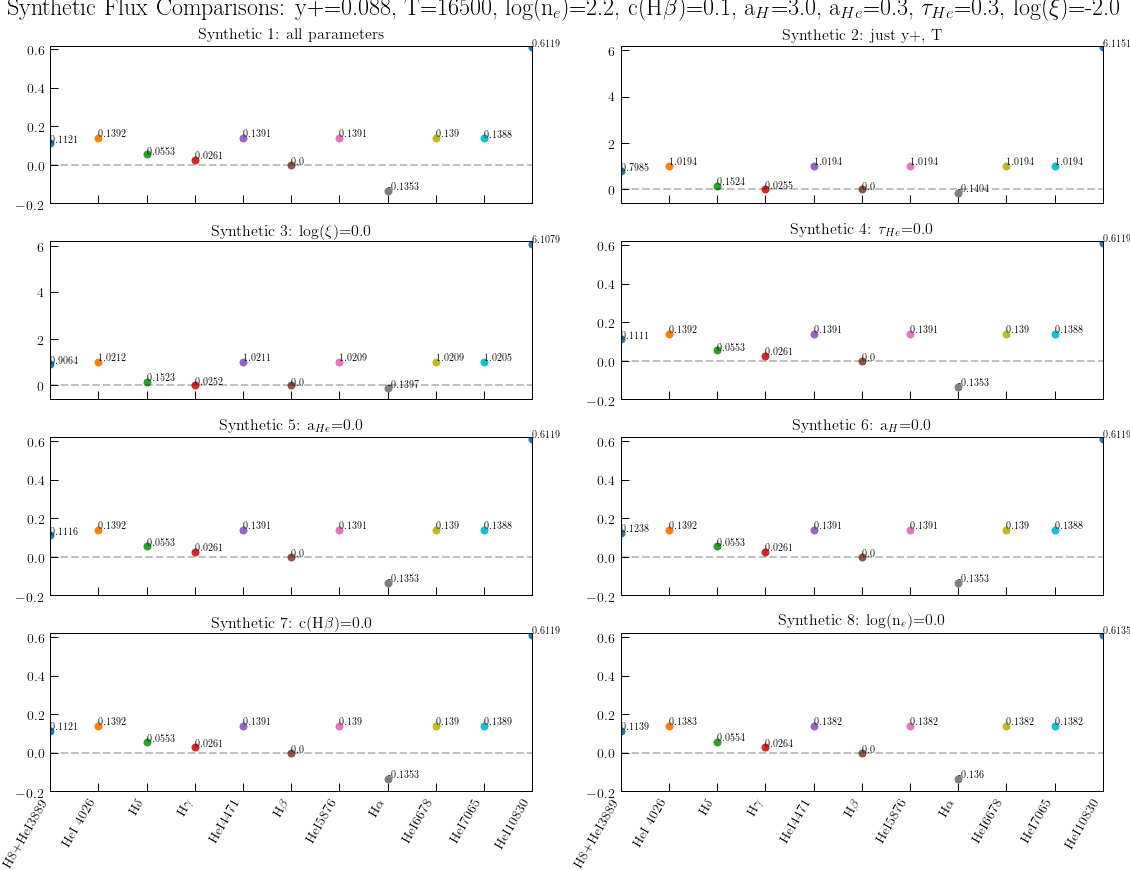

In [14]:
f, ax = plt.subplots(4,2, figsize=(16, 12), sharex=True)

for c in range(1, len(erik.colnames)):
    col = erik.colnames[c]
    ax[0,0].plot(c, (erik[col][0]-R2015[col][0])/R2015[col][0], marker='o', markersize=8)
    ax[0,0].text(c, (erik[col][0]-R2015[col][0])/R2015[col][0], str(round((erik[col][0]-R2015[col][0])/R2015[col][0], 4)))
    ax[0,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,0].set_title('Synthetic 1: all parameters')
    ax[0,0].set_ylim(-0.2, 0.62)
    ax[0,1].plot(c, (erik[col][1]-R2015[col][1])/R2015[col][1], marker='o', markersize=8)
    ax[0,1].text(c, (erik[col][1]-R2015[col][1])/R2015[col][1], str(round((erik[col][1]-R2015[col][1])/R2015[col][1], 4)))
    ax[0,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[0,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[0,1].set_title('Synthetic 2: just y+, T')
    ax[0,1].set_ylim(-0.6, 6.2)
    ax[1,0].plot(c, (erik[col][2]-R2015[col][2])/R2015[col][2], marker='o', markersize=8)
    ax[1,0].text(c, (erik[col][2]-R2015[col][2])/R2015[col][2], str(round((erik[col][2]-R2015[col][2])/R2015[col][2], 4)))
    ax[1,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,0].set_title(r'Synthetic 3: log($\xi$)=0.0')
    ax[1,0].set_ylim(-0.6, 6.2)
    ax[1,1].plot(c, (erik[col][3]-R2015[col][3])/R2015[col][3], marker='o', markersize=8)
    ax[1,1].text(c, (erik[col][3]-R2015[col][3])/R2015[col][3], str(round((erik[col][3]-R2015[col][3])/R2015[col][3], 4)))
    ax[1,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[1,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[1,1].set_title(r'Synthetic 4: $\tau_{He}$=0.0')
    ax[1,1].set_ylim(-0.2, 0.62)
    ax[2,0].plot(c, (erik[col][4]-R2015[col][4])/R2015[col][4], marker='o', markersize=8)
    ax[2,0].text(c, (erik[col][4]-R2015[col][4])/R2015[col][4], str(round((erik[col][4]-R2015[col][4])/R2015[col][4], 4)))
    ax[2,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,0].set_title(r'Synthetic 5: a$_{He}$=0.0')
    ax[2,0].set_ylim(-0.2, 0.62)
    ax[2,1].plot(c, (erik[col][5]-R2015[col][5])/R2015[col][5], marker='o', markersize=8)
    ax[2,1].text(c, (erik[col][5]-R2015[col][5])/R2015[col][5], str(round((erik[col][5]-R2015[col][5])/R2015[col][5], 4)))
    ax[2,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[2,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[2,1].set_title(r'Synthetic 6: a$_{H}$=0.0')
    ax[2,1].set_ylim(-0.2, 0.62)
    ax[3,0].plot(c, (erik[col][6]-R2015[col][6])/R2015[col][6], marker='o', markersize=8)
    ax[3,0].text(c, (erik[col][6]-R2015[col][6])/R2015[col][6], str(round((erik[col][6]-R2015[col][6])/R2015[col][6], 4)))
    ax[3,0].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,0].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,0].set_title(r'Synthetic 7: c(H$\beta$)=0.0')
    ax[3,0].set_ylim(-0.2, 0.62)
    ax[3,0].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
    ax[3,1].plot(c, (erik[col][7]-R2015[col][7])/R2015[col][7], marker='o', markersize=8)
    ax[3,1].text(c, (erik[col][7]-R2015[col][7])/R2015[col][7], str(round((erik[col][7]-R2015[col][7])/R2015[col][7], 4)))
    ax[3,1].axhline(0.0, color='black', alpha=0.025, ls='--')
    ax[3,1].set_xticks(np.arange(1, len(erik.colnames), 1))
    ax[3,1].set_title(r'Synthetic 8: log(n$_{e}$)=0.0')
    ax[3,1].set_ylim(-0.2, 0.62)
    ax[3,1].set_xticklabels(['H8+HeI3889','HeI 4026', r'H$\delta$',r'H$\gamma$','HeI4471', \
                            r'H$\beta$', 'HeI5876',r'H$\alpha$','HeI6678','HeI7065','HeI10830'], rotation=60, ha='right')
f.suptitle(r'Synthetic Flux Comparisons: y+=0.088, T=16500, log(n$_{e}$)=2.2, c(H$\beta$)=0.1, a$_{H}$=3.0, a$_{He}$=0.3, $\tau_{He}$=0.3, log($\xi$)=-2.0', y=1.02, fontsize=24)
f.savefig('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_flux-R2015comparison.pdf', overwrite=True)
f.show()

# Putting synthetic runs into one table

In [ ]:
s1 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_wCR1e4', format='ascii', delimiter=' ')
s2 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_wCR1e4', format='ascii', delimiter=' ')
s3 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_wCR1e4', format='ascii', delimiter=' ')
s4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_wCR1e4', format='ascii', delimiter=' ')
s5 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_wCR1e4', format='ascii', delimiter=' ')
s6 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_wCR1e4', format='ascii', delimiter=' ')
s7 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_wCR1e4', format='ascii', delimiter=' ')
s8 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_wCR1e4', format='ascii', delimiter=' ')

data = np.array([(s1['Flux Ratio']), (s2['Flux Ratio']), (s3['Flux Ratio']), (s4['Flux Ratio']), 
                 (s5['Flux Ratio']), (s6['Flux Ratio']), (s7['Flux Ratio']), (s8['Flux Ratio']) ])
tbl = Table(rows=data, names=('H8+HeI3889','HeI4026','Hd4102','Hg4340','HeI4471',\
      'Hb4861','HeI5876','Ha6563','HeI6678','HeI7065','HeI10830'))
tbl.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_ours_1e4', format='ascii', delimiter=' ', overwrite=True)

In [5]:
s1 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_A2002', format='ascii', delimiter=' ')
s2 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_A2002', format='ascii', delimiter=' ')
s3 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_A2002', format='ascii', delimiter=' ')
s4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_A2002', format='ascii', delimiter=' ')
s5 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_A2002', format='ascii', delimiter=' ')
s6 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_A2002', format='ascii', delimiter=' ')
s7 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_A2002', format='ascii', delimiter=' ')
s8 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_A2002', format='ascii', delimiter=' ')

data = np.array([(s1['Flux Ratio']), (s2['Flux Ratio']), (s3['Flux Ratio']), (s4['Flux Ratio']), 
                 (s5['Flux Ratio']), (s6['Flux Ratio']), (s7['Flux Ratio']), (s8['Flux Ratio']) ])
tbl = Table(rows=data, names=('H8+HeI3889','HeI4026','Hd4102','Hg4340','HeI4471',\
      'Hb4861','HeI5876','Ha6563','HeI6678','HeI7065','HeI10830'))
tbl.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_A2002', format='ascii', delimiter=' ', overwrite=True)

In [6]:
s1 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic1_R2015', format='ascii', delimiter=' ')
s2 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic2_R2015', format='ascii', delimiter=' ')
s3 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic3_R2015', format='ascii', delimiter=' ')
s4 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic4_R2015', format='ascii', delimiter=' ')
s5 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic5_R2015', format='ascii', delimiter=' ')
s6 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic6_R2015', format='ascii', delimiter=' ')
s7 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic7_R2015', format='ascii', delimiter=' ')
s8 = Table.read('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic8_R2015', format='ascii', delimiter=' ')

data = np.array([(s1['Flux Ratio']), (s2['Flux Ratio']), (s3['Flux Ratio']), (s4['Flux Ratio']), 
                 (s5['Flux Ratio']), (s6['Flux Ratio']), (s7['Flux Ratio']), (s8['Flux Ratio']) ])
tbl = Table(rows=data, names=('H8+HeI3889','HeI4026','Hd4102','Hg4340','HeI4471',\
      'Hb4861','HeI5876','Ha6563','HeI6678','HeI7065','HeI10830'))
tbl.write('/Users/thsyu/Software/Yp/test_data/synthetic/synthetic_R2015', format='ascii', delimiter=' ', overwrite=True)